# Ⅰ. 주요 개념

# 1. 토큰의 벡터화

### [1] 용어 정리
- 벡터화(vectorization) : 기계가 자연어 처리를 원활히 수행할 수 있도록 전처리 과정에서 텍스트를 벡터로 변환하는 과정
- BoW(Bag of Words) : 단어의 순서는 고려하지 않고, 단어의 등장 빈도만 고려해서 단어를 벡터화하는 방법. 내림차순 인덱스 부여
- OOV(Out Of Vocabulary) : 단어장에 없는 단어에 대처할 수 없어 난감한 문제
- DTM(문서 단어 행렬, Document-Term Matrix) : BoW를 사용하여 문서를 행으로, 단어를 열로 구성한 행렬.  문서 간 유사도를 비교하는 데 사용됨. 단어의 등장 빈도 반영됨
- 희소벡터(sparse vector) : BoW 또는 DTM과 같이 고차원 행렬에서 대부분의 값이 0인 벡터. 메모리 과다 사용 및 연산량 급증의 문제 야기함.
- 단어장(vocabulary) : DTM에서 중복을 배제한 단어들의 집합(set), 크기 V
- TF-IDF(Term Frequency- Inverse Document Frequency) : 모든 문서에 등장하는 단어는 중요도가 떨어지고, 특정 문서에 특정 단어가 빈번히 등장하면 중요도가 높은 단어임.
- One-hot encoding : 단어의 인덱싱 위치만 1이고 나머지는 0으로 하는 벡터

# 2. 워드 임베딩

### [1] 희소 벡터의 문제점 :
(1) 자원의 저주(cusrse of dimensionality)   
(2) 벡터 간 유사도 없음(내적이 0, orthogonal=독립적)   
(3) 문제점 해결을 위한 제안   
- 희소벡터인 원-핫 벡터의 문제 해결을 위해
  단어장 크기 보다 작은 차원의 밀집 벡터를 학습 => 워드 임베딩
- 임베딩 벡터(embedding vector) : 워드 임베딩를 위한 실수값을 가진 밀집벡터(dense vector)

### [2] 워드 임베딩(Word Embedding)
※ 원핫 벡터 vs 임베딩 벡터
|구분	|원-핫 벡터	|임베딩 벡터|
|:----:|:--------:|:---------:|
|차원	|고차원(단어장의 크기)	|저차원
|다른 |표현	희소 벡터의 일종	|밀집 벡터의 일종
|표현 방법	|수동	|훈련데이터로부터 학습함|
|값의 타입	|1과 0	|실수|
|기반 이론	|빈도 기반	|분포가설/학습|
|알고리즘	|인덱스부여, 원-핫 인코딩 함수 적용	|keras.Embedding, Word2Vec, GloVe, LSA, FastText|

# 3. Word2Vec

### [1] 분포 가설
- 언어학자 존 루퍼트 퍼스(John Rupert Firth)   
  You shall know a word by the company it keeps    
  (곁에 오는 단어들을 보면 그 단어를 알 수 있다)   
- 분포 가설 : 비슷한 문맥에서 같이 등장하는 경향이 있는 단어들은 비슷한 의미를 가진다.

### [2] Word2Vec 종류
- CBoW : 주변 단어를 통해 중심 단어 예측
- Skip-gram : 중심 단어를 통해 주변단어 예측

### [3] 주요 용어
- 중심단어 center word : 예측해야 할 단어
- 주변단어(context word) : 예측에 사용되는 단어
- 윈도우(window) : 중심단어를 예측하기 위해 앞/뒤로 사용될 주변단어 수m. 총 2m의 단어
- 슬라이딩 윈도우 :  윈도우를 계속 움직여 주변단어와 중심단어를 바꿔가며 학습을 위한 뎅터 셋을 만드는 과정
- 룩업테이블(lookup table) : 원-핫 벡터와 가중치 행렬과의 곱은 가중치 행렬의 i위치에 있는 행을 그대로 가져오는 것과 동일함.
- 투사층(projection layer) : Word2Vect에서의 은닉층을 기존 신경망의 은닉층과 구분하기 위한 명칭. 기존 신경망의 은닉층과 달리 활성화 함수가 존재하지 않고 단순히 가중행렬과의 곱셈만 수행하기 때문임.
- 비지도학습(unsupervised learning) : 중심 단어와 주변단어로 feature변수와 label변수를 직접 만들어 학습을 함.
- 셸로우 러닝(shallow learning) : 딥러닝은 여러 은닉층을 가지고 학습을 하는 반면, 셸로우 러닝은 1개 은닉층을 포함한 3개 층으로 구성하여 학습을 진행함.
- 네거티브 샘플링(Negative Sampling) : 연산량을 줄이기 위해서 다중 분류 문제(소프트맥스 함수)를 이진 분류 문제(시그모이드 함수)로 바꿈

# 4. 워드 임베딩의 편향성
### WEAT
- 학습된 Word Embedding을 2차원으로 차원 축소해서 시각화했을 때, 분명히 젠더 중립적인 단어임에도 불구하고 Programmer, Doctor, Engineer 등의 단어는 남성대명사 He에 가깝게, Homemaker, Nurse, Hairdresser 등의 단어는 여성대명사 She에 가깝게 위치하는 것을 보여 줌
### WEAT score
- 벡터 i와 j가 있을 때, cos(i, j)는 벡터 →i와 →j의 cosine similarity를 의미하므로, 아래 식의 s(w,A,B)가 의미하는 것은 target에 있는 단어 w가 두 attribute 셋 A, B에 속한 단어들과의 유사도의 평균(mean)값이 얼마나 차이 나는지를 측정합니다. 즉, s(w,A,B)는 개별 단어 w가 개념축 A-B에 대해 가지는 편향성을 계산한 값이 됩니다. 이 편향성 값은 -2에서 2사이의 값을 가지게 되며, 그 절댓값이 클수록 w는 A-B 개념축에 대해 편향성을 가진다는 뜻이 됩니다.

# Ⅱ. 프로세스와 주요 함수/클래스

# 1. 프로세스 개요

## (1) 워드임베딩 절차

### [1] Bag of Words/ DTM(Document Term Matrix)

### [2] TF-IDF

### [3] 원-핫 인코딩(one-hot encoding)
① 텍스트 데이터에서 단어장 작성   
② 단어장의 단어들 고유 정수(인덱스) 부여(인덱스 부여 순서는 등장빈도의 내림차순)   
③ 각 단어는 해당 인덱스 위치만 1이고 나머지는 0인 벡터 생성(one-hot vector, unit vector)

## (2) WEAT score
- WEAT 계산을 위해서는 총 4개의 단어 셋 X, Y, A, B가 필요
   - X, Y : 조사대상 단어 
   - A, B : 편향 조사 축(대표 단어 추출과정)

# 2. 패키지의 함수/클래스 개요

## (1) gensim.models.Word2Vec
### 인자(버전 4.x)
- vector_size : 벡터 차원
- windows : 문맥 윈도우 수, 양쪽 몇 개의 단어 고려하여 의미 파악
- min_count : 단어에 대한 최소 빈도수
- sg : 0(CBoW), 1(Skip-gram)
### wv
- 기본적으로 단어와 임베딩 간의 매핑을 포함하는 객체를 생성
- 학습 후 다양한 방법으로 임베딩을 쿼리하는 데 직접 사용할 수 있음


# Ⅲ. 프로젝트 : 모든 장르 간 편향성 측정

# 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [ ]:
$ wget https://aiffelstaticprd.blob.core.windows.net/media/documents/synopsis.zip
$ mv synopsis.zip ~/aiffel/NLP/06_weat
$ cd ~/aiffel/NLP/06_weat && unzip synopsis.zip

In [ ]:
$ pip install konlpy

In [1]:
import os
from konlpy.tag import Okt

import numpy as np
from numpy import dot
from numpy.linalg import norm

import matplotlib.pyplot as plt

In [2]:
with open(os.getenv('HOME')+'/aiffel/NLP/06_weat/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [3]:
# 약 15분정도 걸립니다.
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/NLP/06_weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

print("슝~")

슝~


In [4]:
tokenized

[['사운드', '엔지니어', '상우', '유지태', '분', '치매', '할머니', '백성희', '분'],
 ['시절', '상처', '아버지', '박인환', '분', '고모', '신신애', '분', '살'],
 ['겨울', '그', '지방', '방송국', '라디오', '은수', '이영애', '분', '를'],
 ['자연', '소리', '채집', '라디오', '프로그램', '준비', '은수', '상우', '녹음', '여행'],
 ['두', '사람', '날', '은수', '아파트', '밤'],
 ['사랑', '두', '사람', '상우', '주체', '수', '정도', '그녀'],
 ['겨울', '만난', '두', '사람', '관계', '봄', '지나', '여름', '맞이', '삐걱', '거', '린다'],
 ['이혼', '경험', '은수', '상우', '결혼', '생각', '표정', '내비'],
 ['사랑', '상우', '은수', '단호', '말'],
 ['것', '사랑', '그', '사실', '상우', '어찌'],
 ['은수', '상우', '미련', '집착', '감정', '이기', '못', '서울', '강릉', '간다'],
 ['유사',
  '연령',
  '성별',
  '빈부',
  '차이',
  '정치',
  '입장',
  '불문',
  '국민',
  '통합',
  '온',
  '애국심',
  '성역',
  '일침',
  '다큐멘터리',
  '재작년',
  '전국',
  '민족',
  '민주',
  '유가족',
  '협의',
  '회의',
  '장기',
  '농성',
  '인상',
  '다큐멘터리',
  '민들레',
  '를',
  '독립영화',
  '집단',
  '눈사람',
  '이',
  '우리',
  '사회',
  '구석구석',
  '발',
  '애국심',
  '민족주의',
  '강요',
  '현장',
  '발굴',
  '카메라',
  '박홍',
  '서강대',
  '명예',
  '총장',
  '이도형',
  '한국',
  '논단',
  '발행',
  

# 2. 추출된 결과로 embedding model 만들기

In [7]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, 
                 vector_size=100, 
                 window=5,            # 문맥 윈도우 수, 양쪽 몇 개의 단어 고려하여 의미 파악
                 min_count=3,         # 단어에 대한 최소 빈도수
                 sg=0)                # 1(skip-gram), 0(CBoW)


# Gensim 3.X 에서는 아래와 같이 생성합니다. 
# model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)  
# model.most_similar(positive=['영화'])

/opt/conda/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[('작품', 0.8927849531173706),
 ('다큐멘터리', 0.851877748966217),
 ('드라마', 0.8186204433441162),
 ('영화로', 0.8137474060058594),
 ('주제', 0.794055700302124),
 ('코미디', 0.7754621505737305),
 ('감동', 0.7707394361495972),
 ('형식', 0.7686518430709839),
 ('스토리', 0.7624375820159912),
 ('실화', 0.7585650682449341)]

In [15]:
# #print(len(w2v.vocab))   # Gensim 3.X 버전까지는 w2v.vocab을 직접 접근할 수 있습니다. 
# print(len(model.wv.index_to_key))   # Gensim 4.0부터는 index_to_key를 활용해 vocab size를 알 수 있습니다. 
# print(len(model.wv['i']))          # 혹은 단어를 key로 직접 vector를 얻을 수 있습니다. 
print(model.wv.vectors.shape)

(24320, 100)


In [16]:
model.wv.most_similar(positive=['영화'])

[('작품', 0.8927849531173706),
 ('다큐멘터리', 0.851877748966217),
 ('드라마', 0.8186204433441162),
 ('영화로', 0.8137474060058594),
 ('주제', 0.794055700302124),
 ('코미디', 0.7754621505737305),
 ('감동', 0.7707394361495972),
 ('형식', 0.7686518430709839),
 ('스토리', 0.7624375820159912),
 ('실화', 0.7585650682449341)]

In [17]:
model.wv.most_similar(positive=['사랑'])

[('행복', 0.726378858089447),
 ('첫사랑', 0.7159730792045593),
 ('진심', 0.7140522003173828),
 ('만남', 0.6937063336372375),
 ('우정', 0.6918965578079224),
 ('애정', 0.6912146210670471),
 ('고백', 0.6816644072532654),
 ('이별', 0.6772629618644714),
 ('운명', 0.6728448271751404),
 ('가슴', 0.6724494099617004)]

In [18]:
model.wv.most_similar(positive=['연극'])

[('영화감독', 0.9053817987442017),
 ('시나리오', 0.8903347849845886),
 ('배우', 0.8769096732139587),
 ('캐스팅', 0.8630917072296143),
 ('데뷔', 0.8627220392227173),
 ('영감', 0.8583168387413025),
 ('뮤지션', 0.8532187938690186),
 ('출연', 0.8522470593452454),
 ('공연', 0.8493507504463196),
 ('각색', 0.8481107354164124)]

# 3. TF/IDF로 해당 데이터를 가장 잘 표현하는 단어 셋 만들기

- TF-IDF 대표 단어 잘 선정하지만 중복단어 발생 문제
- 중복 단어 발생 문제 => 개념축 혼란 => WEAT(편향성) 계산 결과에 악영향을 줌
- TF-IDF를 적용했을 때의 문제점이 무엇인지 지적 가능하다면 그 문제점을 지적하고 스스로 방법을 개선하여 대표 단어 셋을 구축

- WEAT score를 구할 때 단어 셋을 만들어주어야 합니다. targets_X, targets_Y, attribute_A, attribute_B를 만들어주었던 것이 기억나시죠? 이제 두 축을 어떤 기준으로 잡고, 해당 축의 어떤 항목을 사용할지 정해야 합니다.

- 여기서는 두 축을 영화 장르, 영화 시노십스 정보를 이용하겠습니다. 

#### 'synopsis_art.txt', 'synopsis_gen.txt' 두 파일을 읽고, 명사에 대해서만 추출하여 art, gen 변수에 할당

In [19]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/NLP/06_weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

print("슝~")

슝~


In [20]:
# 2개의 파일을 처리하는데 10분 가량 걸립니다. 
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


#### WEAT 계산을 위해서는 총 4개의 단어 셋 X, Y, A, B가 필요
- 예를 들면 예술영화라는 개념을 가장 잘 대표하는 단어들을 art_txt를 처리해서 만든 art라는 단어 리스트에서부터 골라내야 합니다. 이를 위해서 상식을 동원해서 적절한 단어를 골라낼 수도 있지만 보다 납득할 수 있는 보편적인 방법을 사용하는 것이 좋습니다.

- 어떤 개념을 나타내는 단어를 선정하는 방법으로 어떤 것이 적당할까요? 꼭 정해진 방법이 있는 것은 아닙니다. 그러나 이번 경우에는 예술영화, 일반영화라는 영화 구분별로 시놉시스를 모아 데이터를 구성했습니다. 그렇다면 예술영화를 잘 대표하는 단어란 예술영화 시놉시스에는 자주 나타나지만 그 외 다른 구분의 영화(예를 들어 일반영화) 시놉시스에는 자주 나타나지 않는 것을 고르는 것이 적당할 것입니다.

- 이런 것과 비슷한 개념의 단어 분석 방식 중, TF-IDF라는 것을 이미 접해 보셨을 것입니다. 즉, 코퍼스에서 자주 나타나는(TF가 높은) 단어이지만, 다른 코퍼스에까지 두루 걸쳐 나오지는 않는(IDF가 높은) 단어를 선정하고 싶은 것입니다. 이번에는 단어 셋 구성을 위해 TF-IDF방식을 사용하겠습니다. (그러나 이 방식이 최선이라는 의미는 아닙니다.)

In [21]:
vectorizer = TfidfVectorizer()            # TfidfVectorizer 인스턴스 생성
X = vectorizer.fit_transform([art, gen])  # art와 gen 코퍼스로 학습 실행, 정규화를 위한 평균/표준편차 산출

print(X.shape)

(2, 41082)


In [22]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


In [23]:
m1 = X[0].tocoo()                             # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()                             # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

In [24]:
#상위 100개 단어들 중 중복 단어 제외 한 상위 15개의 단어 추출
#두 개념축이 대조되려면 중복단어를 제외하여 추출하는것이 중요
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [25]:
print(target_art)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']


In [26]:
print(target_gen)
print("슝~")

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']
슝~


In [27]:
#장르별 대표단어 출력
#목적 -> 드라마 장르와 액션 장르를 비교하기
#목적에 해당하는 장르만 지정하기 보다 여러장르를 대표하는 단어를 선정하는 것이 더 효과적
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [28]:
# 약 10분정도 걸립니다.
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [29]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [30]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)

attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 페뷔스, 
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 남자, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 최고, 운명, 사람, 하선, 전쟁, 
서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 마적, 
성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
스릴러: 자신, 그녀, 사건, 

# 4. embedding model과 단어 셋으로 WEAT score 구해보기
- 영화 구분  
- 영화 장르   
각각 의 편향성 측정 후 WEAT score로 계산 후 Heatmap 형태로 시각화
(attribute 구성 케이스에 대한 시각화 추가 및 강조 해보기)

In [31]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

### WEAT score의 수식 전체를 코딩
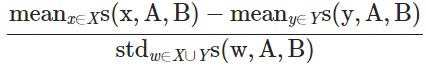

In [32]:
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

#print(round(weat_score(X, Y, A, B), 3))

- target_X는 art, target_Y 는 gen으로 고정하고 
- attribute_A, attribute_B를 바꿔가면서 구해봅시다.(예시 : attribute_A는 '드라마', attribute_B는 '액션')
- 구한 결과를 21x21 매트릭스 형태로 표현해서 matrix 라는 변수에 담아봅시다.

In [33]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]
print("슝~")

슝~


In [34]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

print("슝~")

슝~


In [35]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -0.5064154
SF 공연 -0.3116367
SF 공포(호러) -0.66408366
SF 기타 0.3486409
SF 다큐멘터리 0.58866996
SF 드라마 -0.34783086
SF 멜로로맨스 -0.7684974
SF 뮤지컬 0.3524489
SF 미스터리 -0.70092994
SF 범죄 -0.21889783
SF 사극 -0.7886972
SF 서부극(웨스턴) -0.36978504
SF 성인물(에로) -0.53455544
SF 스릴러 -0.52703977
SF 애니메이션 0.37124443
SF 액션 -0.43327215
SF 어드벤처 -0.74103117
SF 전쟁 0.29077476
SF 코미디 -0.38693058
SF 판타지 -0.1374034
가족 공연 0.26899824
가족 공포(호러) -0.16245045
가족 기타 0.760422
가족 다큐멘터리 0.84590554
가족 드라마 0.22669545
가족 멜로로맨스 -0.60557204
가족 뮤지컬 0.7287064
가족 미스터리 -0.34081647
가족 범죄 0.21791847
가족 사극 -0.057512604
가족 서부극(웨스턴) 0.52136105
가족 성인물(에로) -0.28990865
가족 스릴러 -0.1512102
가족 애니메이션 0.8777861
가족 액션 0.12720239
가족 어드벤처 0.016365593
가족 전쟁 0.6907777
가족 코미디 0.2510581
가족 판타지 0.47259945
공연 공포(호러) -0.29233494
공연 기타 0.8952218
공연 다큐멘터리 0.9030597
공연 드라마 -0.09071171
공연 멜로로맨스 -0.72151905
공연 뮤지컬 0.86506224
공연 미스터리 -0.42244816
공연 범죄 0.045562137
공연 사극 -0.4259196
공연 서부극(웨스턴) 0.03489374
공연 성인물(에로) -0.4845475
공연 스릴러 -0.2670428
공연 애니메이션 0.88135934
공연 액션 -0.

<AxesSubplot:>

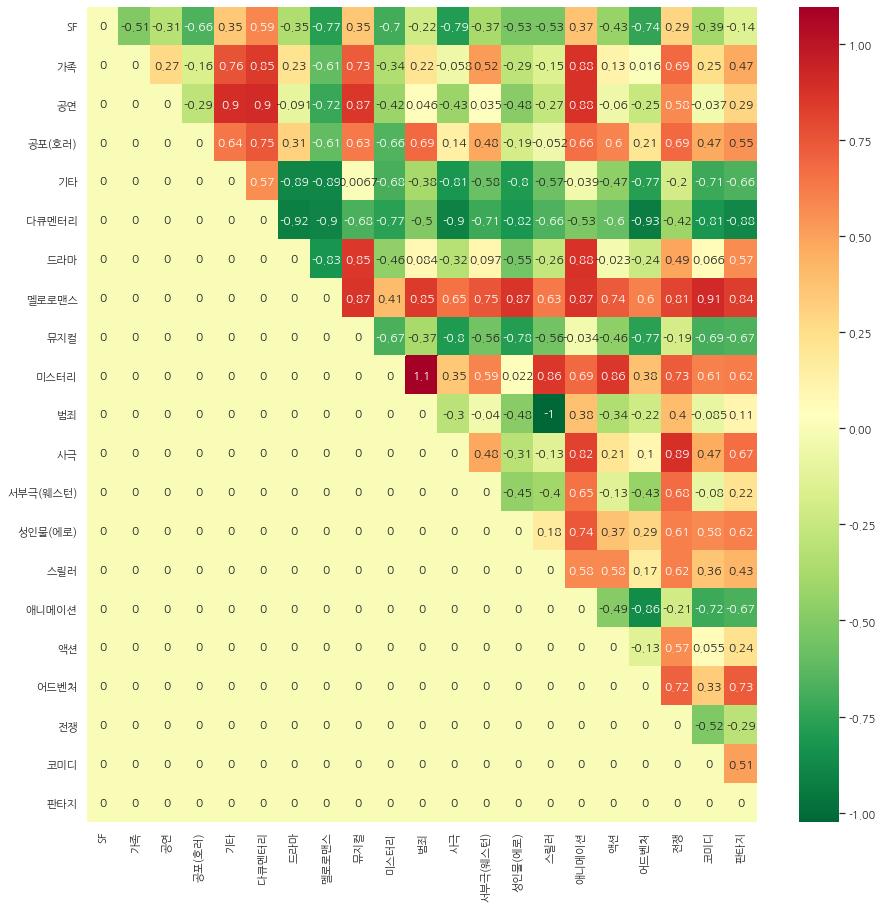

In [36]:
import numpy as np; 
import matplotlib.pyplot as plt;
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 
plt.rcParams['axes.unicode_minus'] = False

#
plt.figure(figsize = (15,15))
ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

# Ⅳ. 결론

## 1. 결과 분석
- 다큐멘터리와 뮤지컬 : 다큐멘터리(일반영화), 뮤지컬(예술영화)  
- 멜로로멘스와 애니메이션 : 멜로로멘스(예술영화)와 애니메이션(일반영화)
- 미스테리와 범죄 : 미스테리(예술영화), 범죄(일반영화)
- 사극과 전쟁 : 사극(예술영화), 전쟁(일반영화)
##### 조금 말이 되는 듯하네요....

## 2. 회고 및 차후 과제

- BoW, TD-IDF, one-hot encoding과 워드임베딩 등의 전체적인 맥락을 잡지 못해 많이 헤맸었다. 이번 과제를 하면서 앞에서 있었던 토큰 방식이 빈도 기반이었던 반면 이번에 나온 Word2Vec, GloVe, FastText는 분포표상을 기반으로 한 것이었음을 이제 가닥을 잡을 수 있었다. 
- TD-IDF도 빈도 기반의 벡터화하는 것으로 전통적인 방식으로 치부할 수 있으나 이번 과정에서와 같이 주요단어를 추출하는데 쓰이는가 하면 분류에도 쓰이는 등 많은 활용도가 있다는 것을 알았고, 코딩에서도 어려운 부분이 있었다. 아직 많은 알아야 할게 많다고 느꼈다.
- 편향성이란 용어가 부정적이고, 찾아낸 계기도 부정적으로 부각되었는데, 달리 생각하면 모든 것이 중립적이면 차별화해야 하는 시대적 방향과도 맞지 않는다고 본다. 물론 제기한 인종/성별에서의 편향성은 다시 검토해야겠지만 그것을 지나치게 부정적으로만 볼 필요는 없다고 본다. 
- 다만 훈련데이타가 어떻게 구성되었냐에 따라 결과가 많은 영향을 받는 다는 것을 상기하고 데이타 수집에서도 많은 기준과 툴을 마련해야 한다는 생각이 들었다.
- 이번 과제에서는 전반적으로 개념 정립과 숨어있는 어려운 코드들이 많아 힘들었다.